The purpose of this notebook is to model with scaled data for better interpertation of coefficient values.


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import standardscaler
from sklearn.preprocessing import StandardScaler

# modeling function import
from model import modeling_reg2

# import metrics
from sklearn.metrics import mean_squared_error

# imports for classifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# read in batter training data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in batter testing data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [3]:
# split data in TTS
X_train = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y_train = batter_train['FPPG']
# testing 
X_test = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
y_test = batter_test['FPPG']

In [4]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [5]:
# instaniate all models
linreg = LinearRegression()
knn = KNeighborsRegressor()
svc = SVR()
forest = RandomForestRegressor()
tree = DecisionTreeRegressor()
abc = AdaBoostRegressor()
bag = BaggingRegressor()

In [6]:
# create list of classifiers
class_list = [linreg, knn, svc, forest, tree, abc, bag]

In [7]:
results1 = modeling_reg2(batter_train, X_train_sc, y_train, batter_test, X_test_sc, y_test, class_list)

In [8]:
results1

Baseline - RMSE  Model - RMSE  R2 Score - Train  \
LinearRegression()              3.078159      2.096171          0.930907   
KNeighborsRegressor()           3.078159      2.944000          0.926268   
SVR()                           3.078159      2.605969          0.951551   
RandomForestRegressor()         3.078159      2.572256          0.988387   
DecisionTreeRegressor()         3.078159      2.672155          1.000000   
AdaBoostRegressor()             3.078159      2.793567          0.918574   
BaggingRegressor()              3.078159      2.613299          0.983888   

                         R2 Score - Test  
LinearRegression()              0.660084  
KNeighborsRegressor()           0.329508  
SVR()                           0.474641  
RandomForestRegressor()         0.488145  
DecisionTreeRegressor()         0.447616  
AdaBoostRegressor()             0.396279  
BaggingRegressor()              0.471681

The RMSE above shows a very large improvement from the baseline model.

In [9]:
# generate predictions on testing data with grid
batter_test['Projected_FPPG'] = linreg.predict(X_test_sc)

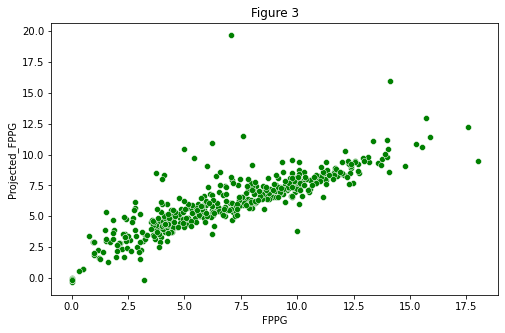

In [34]:
#### graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=batter_test, x='FPPG', y='Projected_FPPG', color='Green')
plt.title('Figure 3')
plt.savefig('../Images/batter_preds');

In [11]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X_train.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [12]:
coef_df

Feature  Coeficient
0      GMS   -3.086197
3        H   -0.888016
12      TB   -0.617851
6       HR   -0.277104
4       2B   -0.186493
5       3B   -0.075215
8       BB   -0.055341
13     AVG   -0.045605
11      CS   -0.028871
10      SB    0.277466
15     SLG    0.322836
9       SO    0.345692
16     OPS    0.437100
17     ISO    0.550156
14     OBP    0.589345
7      RBI    1.087161
2        R    1.137777
1       AB    3.883619

In [13]:
# save projections to file 
batter_test.to_csv('../Projections/batter_projections_2021.csv', index=False)

In [31]:
results1.to_csv('../Projections/results_batter.csv')

---

# Pitcher Data

In [15]:
# read in pitcher training data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# read in batter testing data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [16]:
# split data in TTS
X_train = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'AVG', 'FPPG'])
y_train = pitcher_train['FPPG']
# testing 
X_test = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'AVG', 'FPPG'])
y_test = pitcher_test['FPPG']

In [17]:
# scale data
sc = StandardScaler()
# fit and transform X
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
results = modeling_reg2(pitcher_train, X_train_sc, y_train, pitcher_test, X_test_sc, y_test, class_list)

In [19]:
results

Baseline - RMSE  Model - RMSE  R2 Score - Train  \
LinearRegression()              9.344332      9.777567          0.887721   
KNeighborsRegressor()           9.344332      9.340354          0.939830   
SVR()                           9.344332     10.359744          0.867597   
RandomForestRegressor()         9.344332      6.243273          0.991117   
DecisionTreeRegressor()         9.344332     12.935806          1.000000   
AdaBoostRegressor()             9.344332      7.489096          0.914223   
BaggingRegressor()              9.344332      5.486293          0.987226   

                         R2 Score - Test  
LinearRegression()              0.211404  
KNeighborsRegressor()           0.280353  
SVR()                           0.114699  
RandomForestRegressor()         0.678473  
DecisionTreeRegressor()        -0.380321  
AdaBoostRegressor()             0.537351  
BaggingRegressor()              0.751715

The RMSE above shows a very large improvement from the baseline model.

In [20]:
# generate predictions on testing data with grid
pitcher_test['Projected_FPPG'] = linreg.predict(X_test_sc)

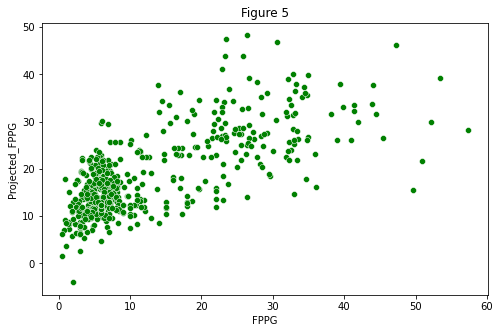

In [33]:
#### graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=pitcher_test, x='FPPG', y='Projected_FPPG', color='Green')
plt.title('Figure 5')
plt.savefig('../Images/pitcher_preds');

In [22]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X_train.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [23]:
coef_df

Feature  Coeficient
13    WHIP  -31.130656
2      GMS   -4.012871
12     ERA   -1.133364
6        H   -0.723690
7        R   -0.619644
9       HR   -0.214696
4       SV   -0.019858
1        L    0.170519
8       ER    0.196460
0        W    0.980298
3       GS    2.418539
5       IP    2.764546
11      SO    4.359418
10      BB   30.869719

In [24]:
# save projections to file 
pitcher_test.to_csv('../Projections/pitcher_projections_2021.csv', index=False)

In [32]:
# results to file
results.to_csv('../Projections/results_pitcher.csv')

---